In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("success")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


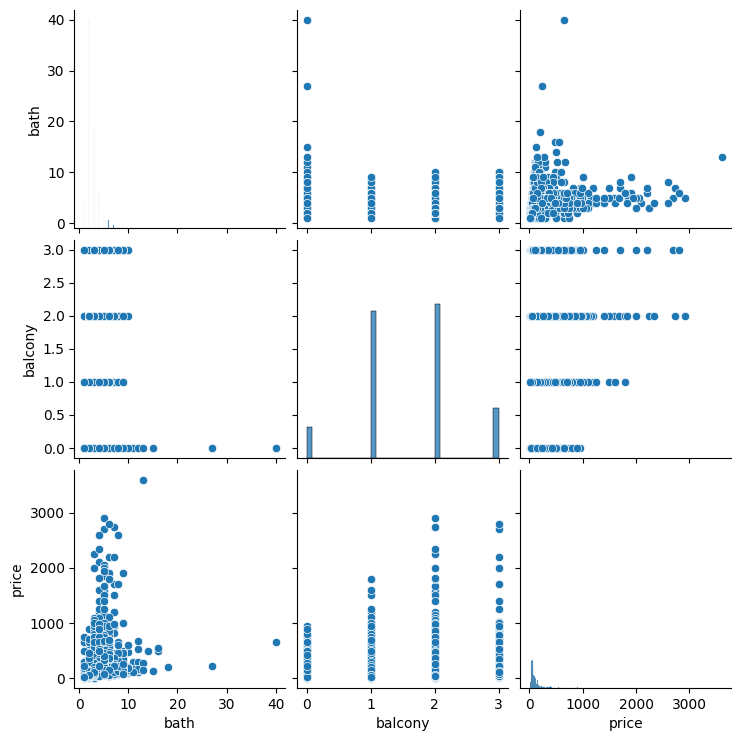

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
 
# get the information of data
df.info()
 
# We have only 3 neumerical features - bath, balcony and price
# 6 categorical features - area type, availability, size, society, and total_srft
# Target Feature =======>>>>>> price >>>>>>
# Price in lakh
 
df.describe()
#observe 75% and max value it shows huge diff
 
sns.pairplot(df)
 
# bath and price have slightly linear correlation with some outliers


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-----------

<Axes: >

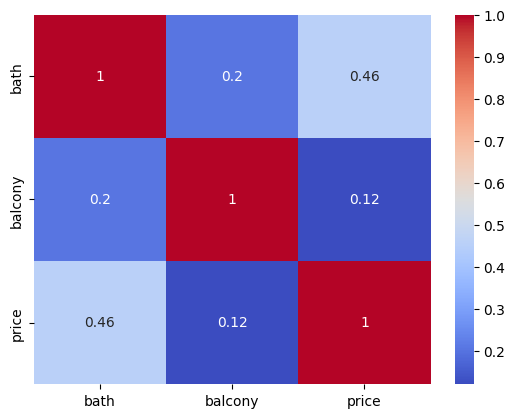

In [3]:
# value count of each feature
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")
 
value_count(df)
 
# correlation heatmap
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

# correlation of bath is greater than a balcony with price
 
"""# 4. Preare Data for Machine Learning Model
 
## Data cleaning
"""

In [4]:
df.isnull().sum() # find the homuch missing data available

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
 
df.isnull().mean()*100 # % of measing value

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

 
#society has 41.3% missing value (need to drop)
 
# visualize missing value using heatmap to get idea where is the value missing

<Axes: >

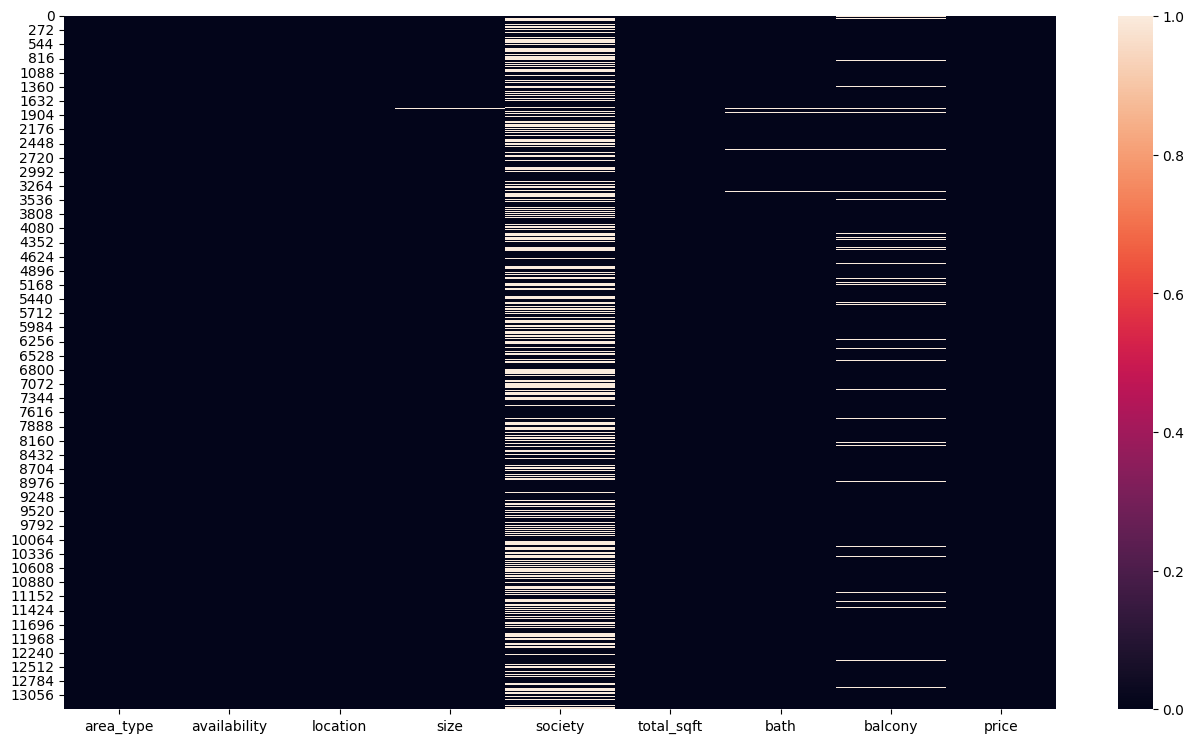

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [7]:
# Drop ----------> society feature
# because 41.3% missing value
df2 = df.drop('society', axis='columns')
df2.shape

(13320, 8)

In [8]:
# fill mean value in --------> balcony feature
# because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [9]:
# drop na value rows from df2
# because there is very less % value missing
df3 = df2.dropna()
df3.shape
 
df3.isnull().sum()
 
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Feature Engineering

In [10]:
# to show all th ecolumns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [16]:
 
"""### Converting 'total_sqft' cat feature in numeric"""
df3['total_sqft'].value_counts()
 
# here we observe that 'total_sqft' contain string value in diff format
#float, int like value 1689.28,817 
# range value: 540 - 740 
# number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds
# best strategy is to convert it into number by spliting it
 
total_sqft_int = []
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
        except:
            total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan



In [17]:
# reset the index of dataframe
df4 = df3.reset_index(drop=True) # drop=True - don't add index column in df
 
# join df4 and total_srft_int list
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()
 
df5.tail()
 
df5.isnull().sum()
 
# drop na value
df6 = df5.dropna()
df6.shape
 
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [55]:
 
"""## Working on <<<< Size >>>> feature"""
 
df6['size'].value_counts()
 
# size feature shows the number of rooms
 
"""
in  size feature we assume that
2 BHK = 2 Bedroom == 2 RK
so takes only number and remove sufix text
"""
size_int = []
for str_val in df6['size']:
    temp=[]
    temp = str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
    print("Noice = ",str_val) 
df6 = df6.reset_index(drop=True)
 
# join df6 and list size_int
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape
 
df7.tail()
 
"""## Finding Outlier and Removing"""

Noice =  2 BHK
Noice =  4 Bedroom
Noice =  3 BHK
Noice =  3 BHK
Noice =  2 BHK
Noice =  2 BHK
Noice =  4 BHK
Noice =  4 BHK
Noice =  3 BHK
Noice =  6 Bedroom
Noice =  3 BHK
Noice =  4 Bedroom
Noice =  2 BHK
Noice =  2 BHK
Noice =  3 Bedroom
Noice =  2 BHK
Noice =  3 BHK
Noice =  3 BHK
Noice =  3 BHK
Noice =  2 BHK
Noice =  1 BHK
Noice =  3 BHK
Noice =  4 Bedroom
Noice =  3 BHK
Noice =  1 RK
Noice =  3 BHK
Noice =  2 BHK
Noice =  3 BHK
Noice =  2 BHK
Noice =  3 BHK
Noice =  4 BHK
Noice =  3 BHK
Noice =  3 BHK
Noice =  3 BHK
Noice =  3 BHK
Noice =  2 BHK
Noice =  2 BHK
Noice =  3 BHK
Noice =  3 BHK
Noice =  2 BHK
Noice =  2 BHK
Noice =  3 BHK
Noice =  1 BHK
Noice =  1 Bedroom
Noice =  2 BHK
Noice =  8 Bedroom
Noice =  2 BHK
Noice =  2 BHK
Noice =  2 Bedroom
Noice =  2 BHK
Noice =  2 BHK
Noice =  3 BHK
Noice =  3 BHK
Noice =  2 BHK
Noice =  3 BHK
Noice =  2 BHK
Noice =  2 BHK
Noice =  6 Bedroom
Noice =  2 BHK
Noice =  3 Bedroom
Noice =  2 BHK
Noice =  4 Bedroom
Noice =  2 BHK
Noice =  8 B

'## Finding Outlier and Removing'

In [56]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


 
"""## Finding Outlier and Removing"""

In [21]:
# function to create histogram, Q-Q plot and boxplot
 
# for Q-Q plots
import scipy.stats as stats
 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()

******* bath *******


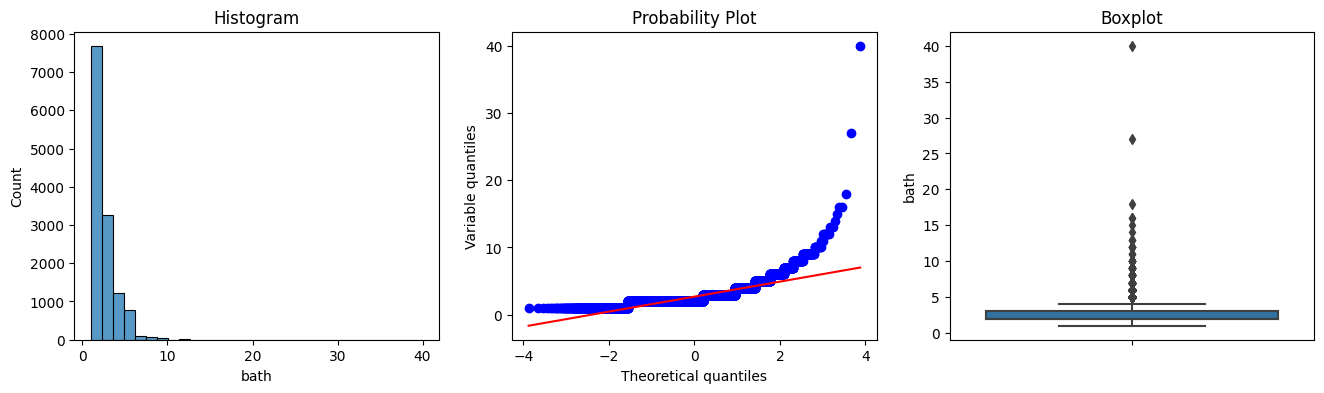

******* balcony *******


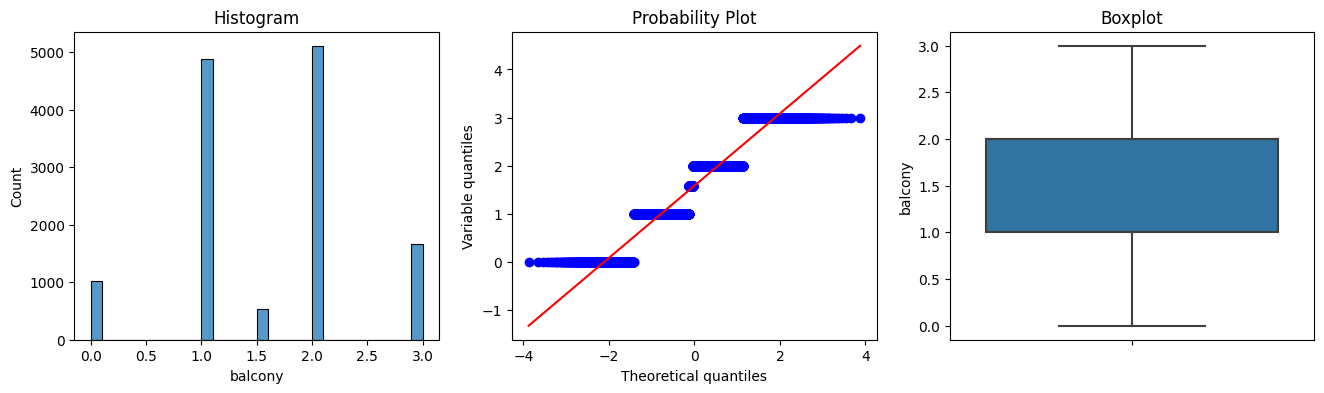

******* total_sqft_int *******


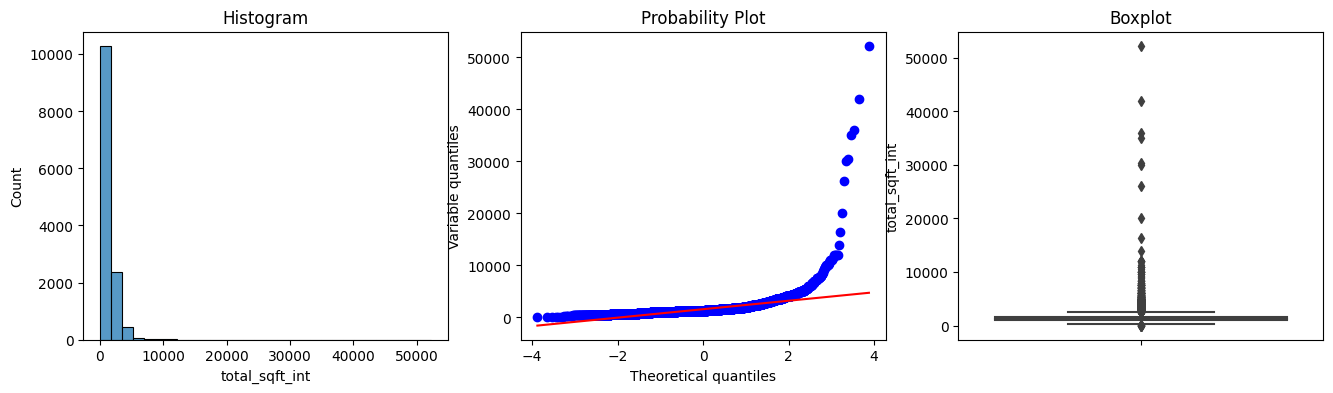

******* bhk *******


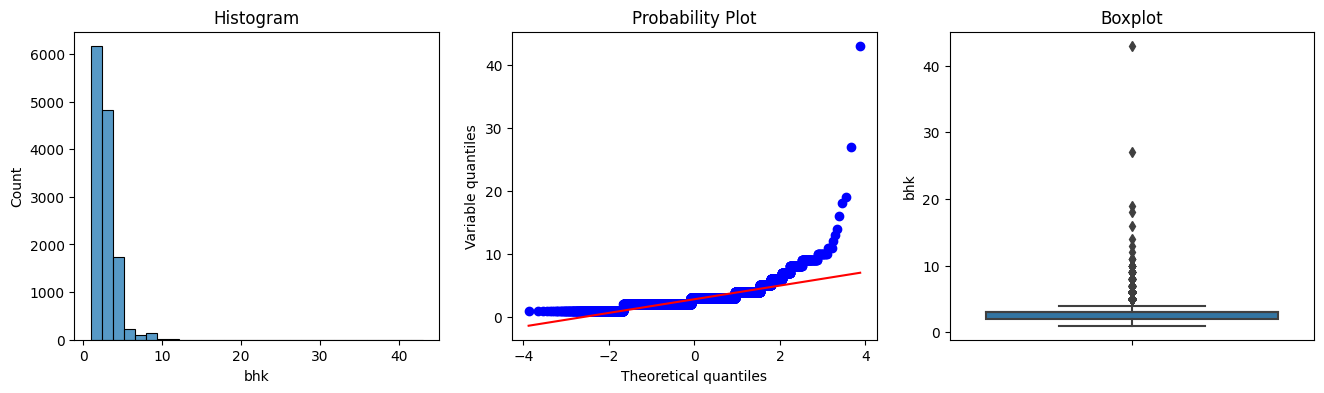

******* price *******


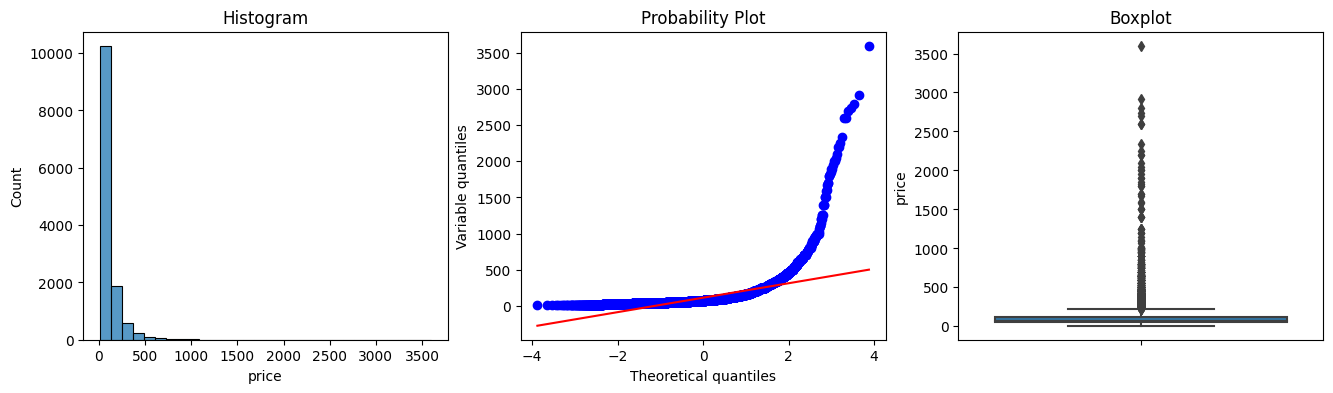

In [22]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df7, var)
 
  # here we observe outlier using histogram,, qq plot and boxplot

In [23]:
# here we consider  1 BHK requierd min 350 sqft are
df7[df7['total_sqft_int']/df7['bhk'] < 350].head()
 
# no we found outliers
 
# if 1 BHK total_sqft are < 350 then we ae going to remove them
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 350)]
df8.shape
 
# create new feature that is price per squre foot 
# it help to find the outliers
 
#price in lakh so conver into rupee and then / by total_sqft_int
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']  
df8.head()
 
df8.price_per_sqft.describe()

C:\Users\malipeddi.hanisha\AppData\Local\Temp\ipykernel_3888\1447731477.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']


count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [24]:
#here we can see huge difference between min and max price_per_sqft
# min 6308.502826 max 176470.588235
 
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 
df9 = remove_pps_outliers(df8)
df9.shape

(8888, 11)

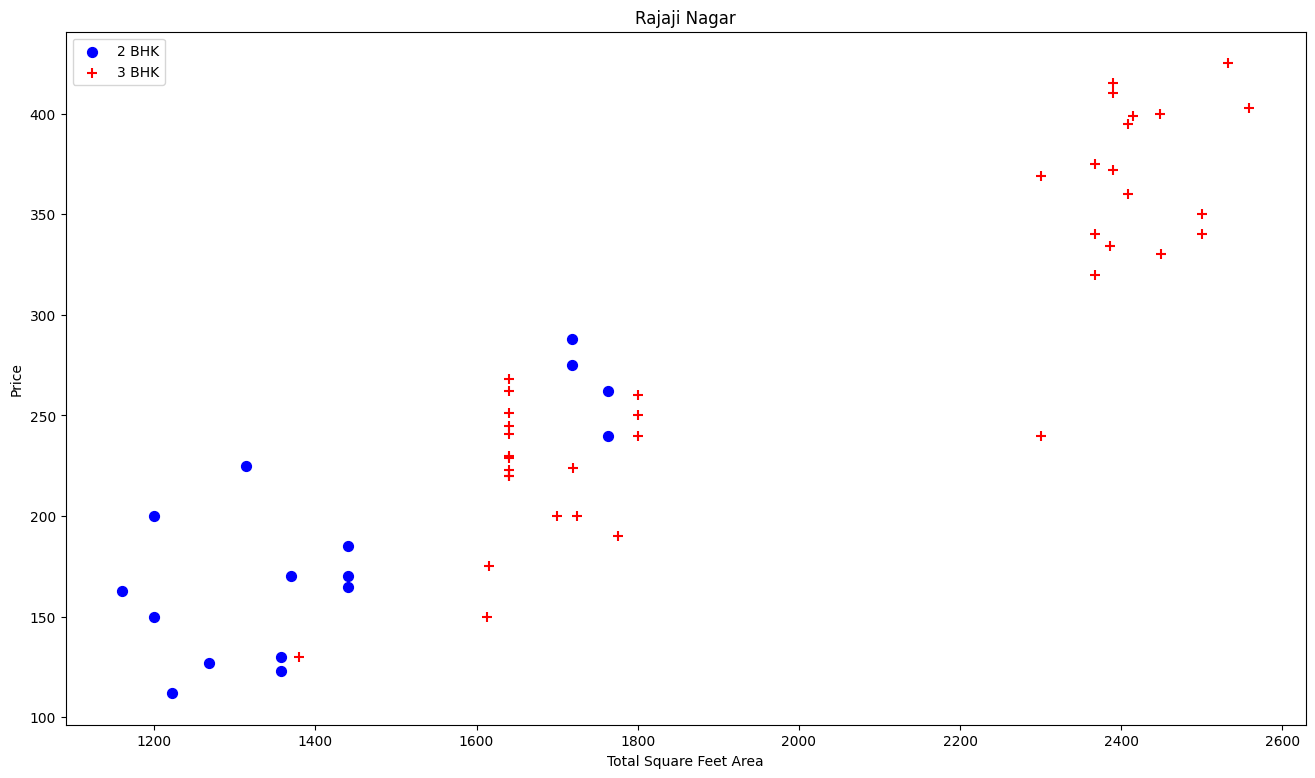

In [25]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
 
plot_scatter_chart(df9, "Rajaji Nagar")

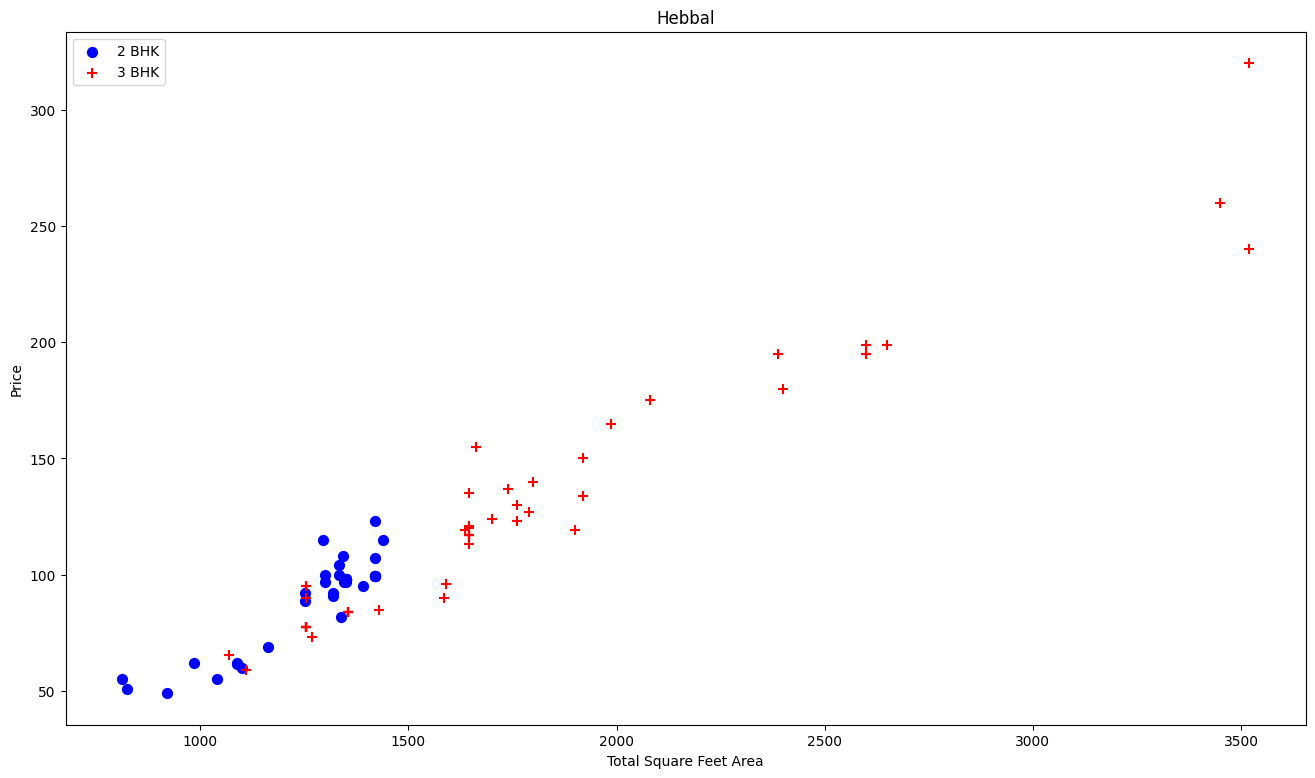

In [26]:
# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier
 
plot_scatter_chart(df9, "Hebbal")
# in below scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier

In [27]:

 
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
 
df10 = remove_bhk_outliers(df9)
df10.shape

(7194, 11)

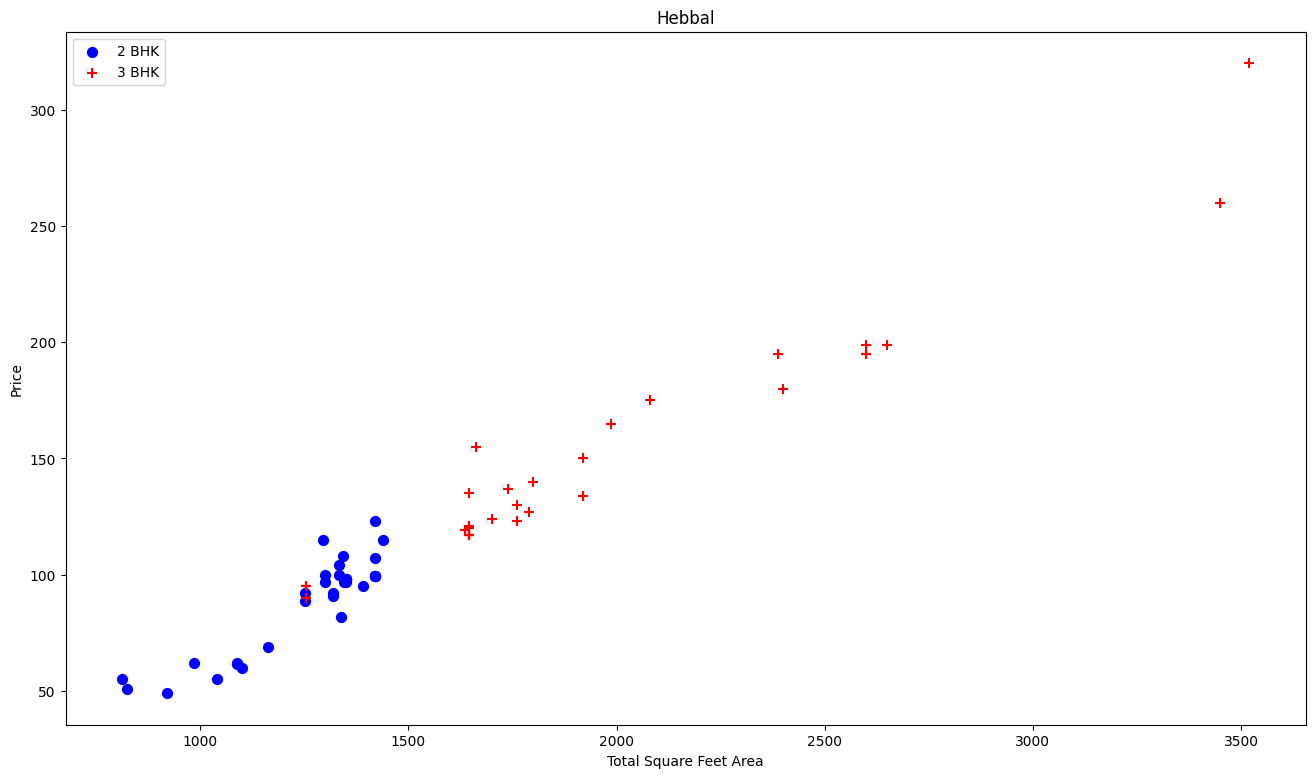

In [28]:
plot_scatter_chart(df10, "Hebbal")
# In below scatter plot most of the red data point remove fron blue points

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


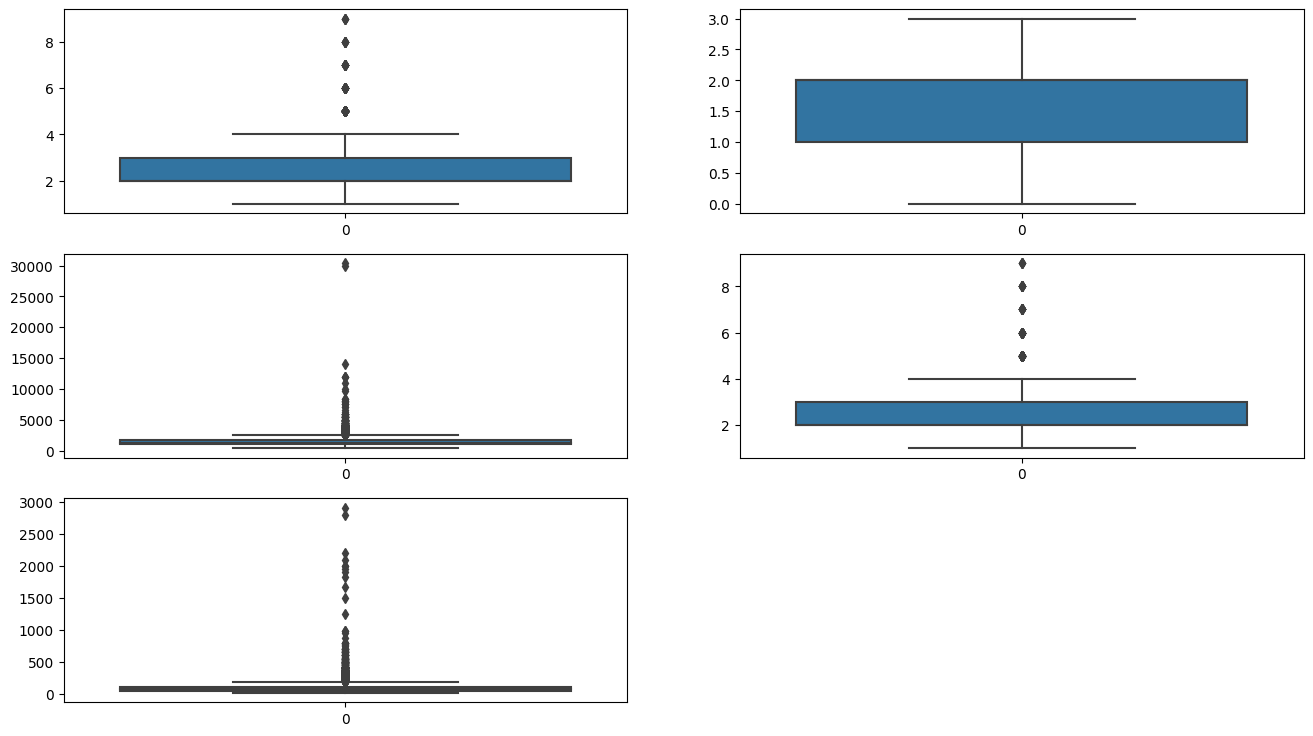

In [29]:
"""### Remove outliers using the help of 'bath' feature"""
 
df10.bath.unique()
 
df10[df10.bath > df10.bhk+2]
 
# here we are considering data only total no. bathroom =  bhk + 1
df11 = df10[df10.bath < df10.bhk+2]
df11.shape
 
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df11[var])
df11.head()

In [30]:
df12 = df11.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
df12.head()

In [ ]:
df12.to_csv("clean_data.csv", index=False) # test ml model on this data
# ML model train on this data and got best score >>>> XGBoost=0.914710

In [31]:

 
"""# Categorical Variable Encoding"""
 
df13 = df11.drop(["size","total_sqft"], axis =1)
df13.head()
 
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type','availability','location'])
df14.shape
 
df14.head()
 
df14.to_csv('oh_encoded_data.csv', index=False) # test ml model on this data
 
"""In ['area_type','availability','location'] contain multiple classe and if we convert them into OHE so it increase the size of DF 
so try to use those classes which are *frequently* present in the car var
 
## Working on <<<<<< area_type >>>>> feature
"""
 
df13['area_type'].value_counts()
 
df15 = df13.copy()
# appy Ohe-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)
df15.shape
 
df15.head(2)
 
"""## Working with <<<<< availability >>>>> Feature"""
 
df15["availability"].value_counts()
 
# in availability feature, 10525 house 'Ready to Move" and remaining will be redy on perticuler date
# so we crate new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
df15["availability_Ready To Move"] = np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape
 
df15.tail()


,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
8883,Super built-up Area,Ready To Move,frazertown,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1
8884,Super built-up Area,18-Nov,manyata park,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0
8885,Plot Area,Ready To Move,tc.palya,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1
8886,Plot Area,18-Apr,tc.palya,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0
8887,Plot Area,18-Apr,tc.palya,2.0,1.0,78.00,1400.0,3,5571.428571,0,0,1,0


In [33]:
"""## Working on <<<< Location >>>> feature"""
 
location_value_count = df15['location'].value_counts()
location_value_count
 
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20
 
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df16 = df15.copy()
for cat_var in location_gert_20:
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
df16.shape
 
df16.head()


C:\Users\malipeddi.hanisha\AppData\Local\Temp\ipykernel_3888\865572472.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
C:\Users\malipeddi.hanisha\AppData\Local\Temp\ipykernel_3888\865572472.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)


,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Chandapura,location_Koramangala,location_Kaggadasapura,location_Kundalahalli,location_Ramagondanahalli,location_Budigere,location_Hulimavu,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_Yeshwanthpur,location_Gottigere,location_8th Phase JP Nagar,location_JP Nagar,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Old Airport Road,location_Sahakara Nagar,location_Brookefield,location_Kengeri,location_Hosa Road,location_Vijayanagar,location_Balagere,location_Green Glen Layout,location_Bommasandra,location_Rachenahalli,location_Panathur,location_Old Madras Road,location_Kudlu Gate,location_Mysore Road,location_Thigalarapalya,location_Talaghattapura,location_Kadugodi,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Frazer Town,location_Kanakapura,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_Lakshminarayana Pura,location_Nagarbhavi,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Kudlu,location_CV Raman Nagar,location_Jalahalli,location_Kengeri Satellite Town,location_Doddathoguru,location_Bhoganhalli,location_Subramanyapura,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_Hosur Road,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Domlur,location_Horamavu Banaswadi,location_Tumkur Road,location_Mahadevpura
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
"""## Drop categorical variable"""
 
df17 = df16.drop(["area_type","availability",'location'], axis =1)
df17.shape
 
df17.head()
 
df17.to_csv('ohe_data_reduce_cat_class.csv', index=False)

# Training and saving

In [58]:
# -*- coding: utf-8 -*-
"""v2-ML Model-bangalore_house_price_prediction.ipynb
 
Automatically generated by Colaboratory.
 
Original file is located at
    https://colab.research.google.com/drive/1XWPm8WX4DN7ig9rUPXwC1lV2azVn44O2
 
# Bangalore House Price Prediction - Outlier Detection
 
This notebook only train ML model on different ml algorithms
"""
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [59]:
df = pd.read_csv('oh_encoded_data.csv')

In [60]:
# This file contain [area_type  availability    location    bath    balcony price   total_sqft_int  bhk price_per_sqft]
# and ['area_type','availability','location'] this are cat var
# We encoded few classes from above car var in OHE 
 
df.shape
 
df.shape
 
df.head()


,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2.0,1.0,70.0,1200.0,3.0,5833.333333
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1350.0,2.0,11037.037037
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1597.0,4.0,9392.611146
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1125.0,2.0,3911.111111
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1200.0,2.0,3333.333333


In [61]:
"""## Split Dataset in train and test"""
 
X = df.drop("price", axis=1)
y = df['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (4860, 8)
Shape of y =  (4860,)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (3888, 8)
Shape of y_train =  (3888,)
Shape of X_test =  (972, 8)
Shape of y_test =  (972,)


In [63]:
 
"""## Feature Scaling"""
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'Super built-up  Area'

In [43]:
 
"""## Machine Learning Model Training
 
## Linear Regression
"""
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()

In [44]:
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))
 
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(-6.819265412497294e+22, 37016087007304.14)

In [45]:
# Lasso 
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse

(0.8541879890402292, 54.127548785441085)

In [46]:
"""## Support Vector Machine"""
 
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.2630802200711362
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse

(0.02569024934855524, 139.9169194720529)

In [47]:
"""## Random Forest Regressor"""
 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.8847434889198429, 48.1231940550816)

In [49]:
"""## XGBoost"""
 
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) # with 0.8838865742273464
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse
 
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))

                    Model         Score          RMSE
0       Linear Regression -6.819265e+22  3.701609e+13
1                   Lasso  8.541880e-01  5.412755e+01
2  Support Vector Machine  2.569025e-02  1.399169e+02
3           Random Forest  8.847435e-01  4.812319e+01
4                 XGBoost  8.875063e-01  4.754292e+01


In [50]:
"""## Cross Validation"""
 
'''from sklearn.model_selection import KFold,cross_val_score
cvs = cross_val_score(xgb_reg, X_train,y_train, cv = 10)
cvs, cvs.mean() # 0.9845963377450353)'''
 
'''cvs_rfr = cross_val_score(rfr, X_train,y_train, cv = 10)
cvs_rfr, cvs_rfr.mean() # 0.9652425691235843)'''
 
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean() # 0.9652425691235843)'''

(array([0.99168838, 0.96270995, 0.99473206, 0.96718045, 0.95456201,
        0.92485562, 0.93568542, 0.90276169, 0.99355167, 0.98666607]),
 0.9614393332603226)

# Hyperparameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.
 
              'n_estimators': [100,300,500]}

In [ ]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)
 
xgb_grid.fit(X_train, y_train)
 
print(xgb_grid.best_score_) # 0.9397345161940295
print(xgb_grid.best_params_)

Fitting 2 folds for each of 3888 candidates, totalling 7776 fits


In [ ]:
xgb_tune = xgb_grid.estimator
 
xgb_tune.fit(X_train,y_train) # 0.9117591385438816
xgb_tune.score(X_test,y_test)

In [ ]:
cvs = cross_val_score(xgb_tune, X_train,y_train, cv = 10)
cvs, cvs.mean() #  0.9645582338461773)'''
 
#[i/10.0 for i in range(1,6)]
 
#xgb_grid.estimator
 
xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.6, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.25, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

In [ ]:
parameters = {'learning_rate': [0.1,0.03, 0.05, 0.07], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1,3,5], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4, 6, 8], #[default=6] The maximum depth of a tree,
              'gamma':[0,0.1,0.001,0.2], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7,1,1.5], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [0.7,1,1.5], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.
              'n_estimators': [100,300,500]}
 
xgb_tune2 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=0.9, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb_tune2.fit(X_train,y_train) # 0.9412851220926807
xgb_tune2.score(X_test,y_test)

In [ ]:
cvs = cross_val_score(xgb_tune2, X_train,y_train, cv = 5)
cvs, cvs.mean() #  0.9706000326331659'''
 
np.sqrt(mean_squared_error(y_test, xgb_tune2.predict(X_test)))
 

In [ ]:
 
"""## Test Model"""
 
list(X.columns)
 
# it help to get predicted value of hosue  by providing features value 
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):
    
 
    x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model

      # adding feature's value accorind to their column index
    x[0]=bath
    x[1]=balcony
    x[2]=total_sqft_int
    x[3]=bhk
    x[4]=price_per_sqft

    if "availability"=="Ready To Move":
        x[8]=1

        if 'area_type'+area_type in X.columns:
            area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
            x[area_type_index] =1

        #print(area_type_index)

        if 'location_'+location in X.columns:
            loc_index = np.where(X.columns=="location_"+location)[0][0]
            x[loc_index] =1

            #print(loc_index)

          #print(x)

      # feature scaling
        x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
        #print(x)

        return model.predict([x])[0] # return the predicted value by train XGBoost model
 


In [ ]:
predict_house_price(model=xgb_tune2, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")
 
##test sample
#area_type  availability    location    bath    balcony price   total_sqft_int  bhk price_per_sqft
#2  Super built-up Area Ready To Move   Devarabeesana Halli 3.0 2.0 150.0   1750.0  3   8571.428571
 
predict_house_price(model=xgb_tune2, bath=3,balcony=2,total_sqft_int=1750,bhk=3,price_per_sqft=8571.428571,area_type="Super built-up",availability="Ready To Move",location="Devarabeesana Halli")
 
##test sample
#area_type  availability    location    bath    balcony price   total_sqft_int  bhk price_per_sqft
#1  Built-up Area   Ready To Move   Devarabeesana Halli 3.0 3.0 149.0   1750.0  3   8514.285714
predict_house_price(model=xgb_tune2,bath=3,balcony=3,total_sqft_int=1750,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")
 


In [ ]:
"""# Save model & load model"""
 
import joblib
# save model
joblib.dump(xgb_tune2, 'bangalore_house_price_prediction_model.pkl')
joblib.dump(rfr, 'bangalore_house_price_prediction_rfr_model.pkl')
 
# load model
bangalore_house_price_prediction_model = joblib.load("bangalore_house_price_prediction_model.pkl")
 
# predict house price
predict_house_price(bangalore_house_price_prediction_model,bath=3,balcony=3,total_sqft_int=150,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")
